In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics



In [81]:
iris=sns.load_dataset("iris")#加载数据集
iis = iris.iloc[:100,:]      #取前100行数据，即是前两种花：setosa、versicolor两种花
iris.head()                  #数据集预览


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
dummies_iris = pd.get_dummies(iris['species'], prefix= 'species')  # 重新编码，把两种花种类用1和0表示
iris_df = pd.concat([iris, dummies_iris], axis=1)
iris_df.drop(['species','species_versicolor'], axis=1, inplace=True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [83]:
def error_number(X_train,X_test,Y_train,Y_test,w):           #  定义并获取错误率
    train_pred = np.round(1/(1+np.exp(-( X_train * w ))))
    test_pred = np.round(1/(1+np.exp(-( X_test * w) )))
    error_train = 1- metrics.accuracy_score(Y_train, train_pred)
    error_test = 1- metrics.accuracy_score(Y_test, test_pred)
    return error_train,error_test

def gradient_descent(X_train,X_test,Y_train,Y_test ,alpha=0.001,epoch=50):   #梯度下降法
    
    w = np.ones((X_train.shape[1],Y_train.shape[1]))#初始化
    error_train = np.ones((epoch,))
    error_test = np.ones((epoch,))
    for i in range(epoch):#训练数据
        error_train[i],error_test[i] = error_number(
            X_train,X_test,Y_train,Y_test,w)
        error = 1/(1+np.exp(-( X_train * w ))) - Y_train
        w = w - alpha * X_train.transpose() * error
    return w,error_train,error_test

测试集大小:0.1， 训练集准确率: 1.000  测试集准确率:1.000
测试集大小:0.3， 训练集准确率: 1.000  测试集准确率:1.000
测试集大小:0.5， 训练集准确率: 1.000  测试集准确率:1.000


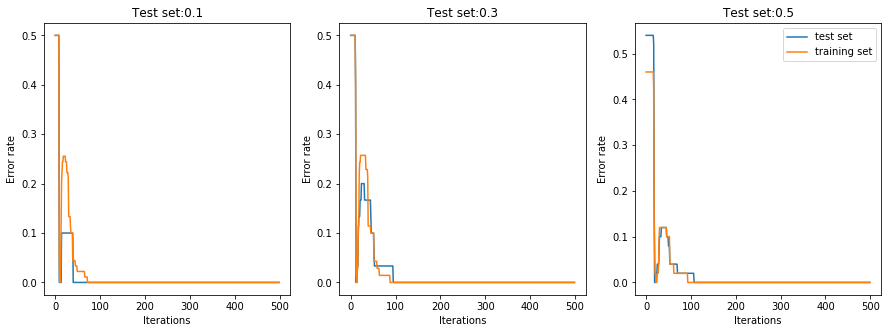

In [79]:
Y =iris_df.iloc[:,4:]
X =iris_df.iloc[:,2:4]
X["b"] = 1
fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i,test_sizei in enumerate([0.1,0.3,0.5]):#模型求解
    X_train,X_test,Y_train,Y_test = train_test_split(np.mat(X) ,np.mat(Y), test_size=test_sizei, random_state= 123)
    w,error_train,error_test = gradient_descent(X_train,X_test,Y_train,Y_test ,alpha=0.001,epoch=500)
    print("测试集大小:{0:.1f}， 训练集准确率: {1:.3f}  测试集准确率:{2:.3f}".format(
                 test_sizei,1-error_train[-1:][0],
                 1-error_test[-1:][0]))
    
    sns.lineplot(x=range(0,len(error_test),1), y=error_test, #绘制图形
                 linewidth=1.5,ax=axs[i])
    sns.lineplot(x=range(0,len(error_train),1), y=error_train,
                 linewidth=1.5,ax=axs[i])
    
    axs[i].set_ylabel("Error rate")#错误率
    axs[i].set_title("Test set:{0:.1f}".format(test_sizei))#测试集的比例大小
    axs[i].set_xlabel("Iterations")#迭代次数
    plt.legend(['test set','training set'])#标注